In [20]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn
from sklearn.model_selection import train_test_split
#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

from imblearn.over_sampling import RandomOverSampler

#FeatureEngineering
#!pip install lightgbm
#from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold


import  textblob
#import xgboost
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
#nltk.download('wordnet')
from textblob import Word

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [22]:
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.cluster import KMeans 
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import normalize,Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score,pairwise_distances

#### Importing Data

In [23]:
#dataframe job postings
job_post=pd.read_csv('C:/Users/Yash/Desktop/STATS/CASE STUDY FOR ML/6. Analyzing online Job Postings/data job posts.csv')


In [24]:
job_post.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
5,"Boutique ""Appollo""\nJOB TITLE: Saleswoman\nPO...","Jan 10, 2004",Saleswoman,"Boutique ""Appollo""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For further information, please contact Irina\...",NaN,01 February 2004,NaN,NaN,NaN,2004,1,False
6,OSI Assistance Foundation - Armenian Branch Of...,"Jan 11, 2004",Chief Accountant/ Finance Assistant,OSI Assistance Foundation - Armenian Branch Of...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For submission of applications/ CVs, please\nc...",NaN,"16 January 2004, 6:00 pm.",NaN,NaN,NaN,2004,1,False
7,International Research & Exchanges Board (IREX...,"Jan 13, 2004",Non-paid part or full time Programmatic Intern,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,6 months,...,NaN,"To apply, please download and submit the\nappl...",NaN,16 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
8,Yerevan Brandy Company \nJOB TITLE: Assistant...,"Jan 13, 2004",Assistant to Managing Director,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"27 January 2004, 18:00",NaN,NaN,NaN,2004,1,False
9,American Embassy Yerevan\nANNOUNCEMENT NUMBER:...,"Jan 13, 2004","Program Assistant (INL), FSN-8; FP-6*",American Embassy Yerevan\nANNOUNCEMENT NUMBER:...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Interested candidates for this position should...,NaN,26 January 2004 \nDrafted: GSargsyan\nClear...,NaN,NaN,NaN,2004,1,False


#### Data Exploratory

In [25]:
job_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [26]:
job_post.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

### Data Selection

In [27]:
# Useful columns from datasets
job_post=job_post[['jobpost', 'Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC','Year', 'Month', 'IT']]

In [28]:
# Treating missing values
job_post[['Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC']]=job_post[['Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC']].fillna(job_post[['Title', 'Company','JobDescription', 'JobRequirment', 'RequiredQual','AboutC']].mode().index[0])

In [29]:
job_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jobpost         19001 non-null  object
 1   Title           19001 non-null  object
 2   Company         19001 non-null  object
 3   JobDescription  19001 non-null  object
 4   JobRequirment   19001 non-null  object
 5   RequiredQual    19001 non-null  object
 6   AboutC          19001 non-null  object
 7   Year            19001 non-null  int64 
 8   Month           19001 non-null  int64 
 9   IT              19001 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 1.3+ MB


In [30]:
# Number of job posts by titles
classes = job_post['Title'].value_counts()[:21]
keys = classes.keys().to_list()

job_post = job_post[job_post['Title'].isin(keys)]
job_post['Title'].value_counts()

Accountant                                328
Chief Accountant                          219
Medical Representative                    216
Sales Manager                             166
Administrative Assistant                  155
Lawyer                                    151
Software Developer                        134
Project Manager                           117
English Language Courses                  109
Web Developer                             101
Java Developer                             88
Marketing Specialist                       87
Office Manager                             85
Receptionist/ Administrative Assistant     77
System Administrator                       75
Graphic Designer                           75
Marketing Manager                          72
Software Engineer                          69
Senior Java Developer                      69
QA Engineer                                66
PHP Developer                              65
Name: Title, dtype: int64

### Supervised Learning

In [31]:
df=job_post[['RequiredQual','IT']]

### Basic Exploratory Analysis

In [32]:
df['RequiredQual'] = df['RequiredQual'].astype(str)

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['RequiredQual'].apply(lambda x: check_pos_tag(x, 'pron')) 


### Calculating Sentiment analysis using Textblob module

In [33]:
df['sentiment'] = df["RequiredQual"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [34]:
df.IT.value_counts()

False    1923
True      601
Name: IT, dtype: int64

df.groupby('IT')['RequiredQual'].count().plot.bar(x='lab', y='val', rot=0)

plt.show()

In [35]:
# convert label to a numeric variable
df['IT'] = np.where(df.IT==False,0,1)

### Split the data into train & Test

In [36]:
# train features and labels 
y = df['IT']
X = df['RequiredQual']

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.50, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1262,)
(1262,)
(1262,)
(1262,)


### Creating user defined functions for clean the text and pre-process the data

In [37]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [38]:
stop = set(nltk.corpus.stopwords.words('english'))

In [39]:
import string
def pre_process(text):
    #text = text.str.replace('/','')                           #Replacing the / with none
    text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text=re.sub(r'!"#$%&()*,-./:;<=>?@\[]^_`{|}~','', text)     #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
   # text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
   # text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [40]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [41]:
X_train=pre_process(X_train)
X_test =pre_process(X_test)

### Vectorization (Count, Tfidf, Hashing)
        - Charter level
        - Word level
        - n-grams

In [42]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(2, 3),  
                             encoding='latin-1',
                             max_df=0.9,min_df=0.001)
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)

In [43]:
xtrain_count

<1262x14889 sparse matrix of type '<class 'numpy.int64'>'
	with 84261 stored elements in Compressed Sparse Row format>

### View the document term metrics

In [44]:
dtm=xtrain_count.toarray()

In [45]:
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
count_vect.get_feature_names()

['a engineer',
 'a engineer experience',
 'a engineer role',
 'a engineer software',
 'a process',
 'a process methodology',
 'a role',
 'a role ideally',
 'a self',
 'a self process',
 'a testing',
 'ability ability',
 'ability achieve',
 'ability achieve result',
 'ability act',
 'ability act team',
 'ability adapt',
 'ability adapt change',
 'ability adapt learn',
 'ability analyze',
 'ability analyze communicate',
 'ability analyze complex',
 'ability analyze evaluate',
 'ability analyze interpret',
 'ability analyze product',
 'ability analyze provide',
 'ability analyze resultoriented',
 'ability apply',
 'ability apply concept',
 'ability apply quality',
 'ability apply unit',
 'ability appropriately',
 'ability appropriately make',
 'ability aptitude',
 'ability aptitude oral',
 'ability articulate',
 'ability articulate senior',
 'ability ass',
 'ability ass situation',
 'ability assume',
 'ability assume responsibility',
 'ability bring',
 'ability bring assignment',
 'abilit

In [47]:
dtm1=pd.DataFrame(dtm)

In [48]:
dtm1.columns=count_vect.get_feature_names()

In [49]:
dtm1.head()

,a engineer,a engineer experience,a engineer role,a engineer software,a process,a process methodology,a role,a role ideally,a self,a self process,...,year supervisor,year supervisor responsibility,year upper,year upper management,year web,year web application,year work,year work experience,year working,year working experience
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Vectorization (count, tfidf) for both train & test

In [50]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             max_features=800)

xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)


In [51]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [52]:
dtm2.head(10)

,a,ability,able,abroad,academic,acceptance,accepted,access,according,account,...,worker,working,workload,workplace,world,would,write,writing,written,year
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.065092,0.000000
1,0.0,0.017977,0.0,0.0,0.065311,0.0,0.0,0.0,0.0,0.0,...,0.0,0.067730,0.0,0.0,0.0,0.000000,0.0,0.0,0.030677,0.017485
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.385314,0.0,0.0,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.103409
4,0.0,0.123057,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.059842
5,0.0,0.158635,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.298828,0.0,0.0,0.0,0.000000,0.0,0.0,0.135349,0.000000
6,0.0,0.086606,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.084232
7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.194500,0.000000
8,0.0,0.073398,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.071387
9,0.0,0.140161,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.136319


In [54]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(1, 2), max_features=800)
tfidf_vect_ngram.fit(df['RequiredQual'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

### Topic Modeling

In [55]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=15, learning_method='batch', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [56]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['reliable active positive result colleague handling maintain build openminded motivate',
 'adore testing photoshop draw morel graphic test illustration design methodology',
 'skill language knowledge russian education work higher excellent english armenian',
 'asset law legal community subject document passion efficiency explorer agent',
 'government donor world community rural honesty u slaveholder agency structure',
 'privilege insurance central pm acquaintance armsoftware decision express hour capability',
 'integrity action maintain personal institution commitment efficiency credit hand establish',
 'puncture timely manner openminded eager selfconfident communicative complete skill task',
 'frame wellorganized resultoriented strict market goal worker customer sell desire',
 'database framework integration development combat cava lead haven line learner',
 'must drive maintaining posse take based competence according theory thinking',
 'enthusiasm take introduce either attitude abi

In [57]:
from wordcloud import WordCloud ,STOPWORDS

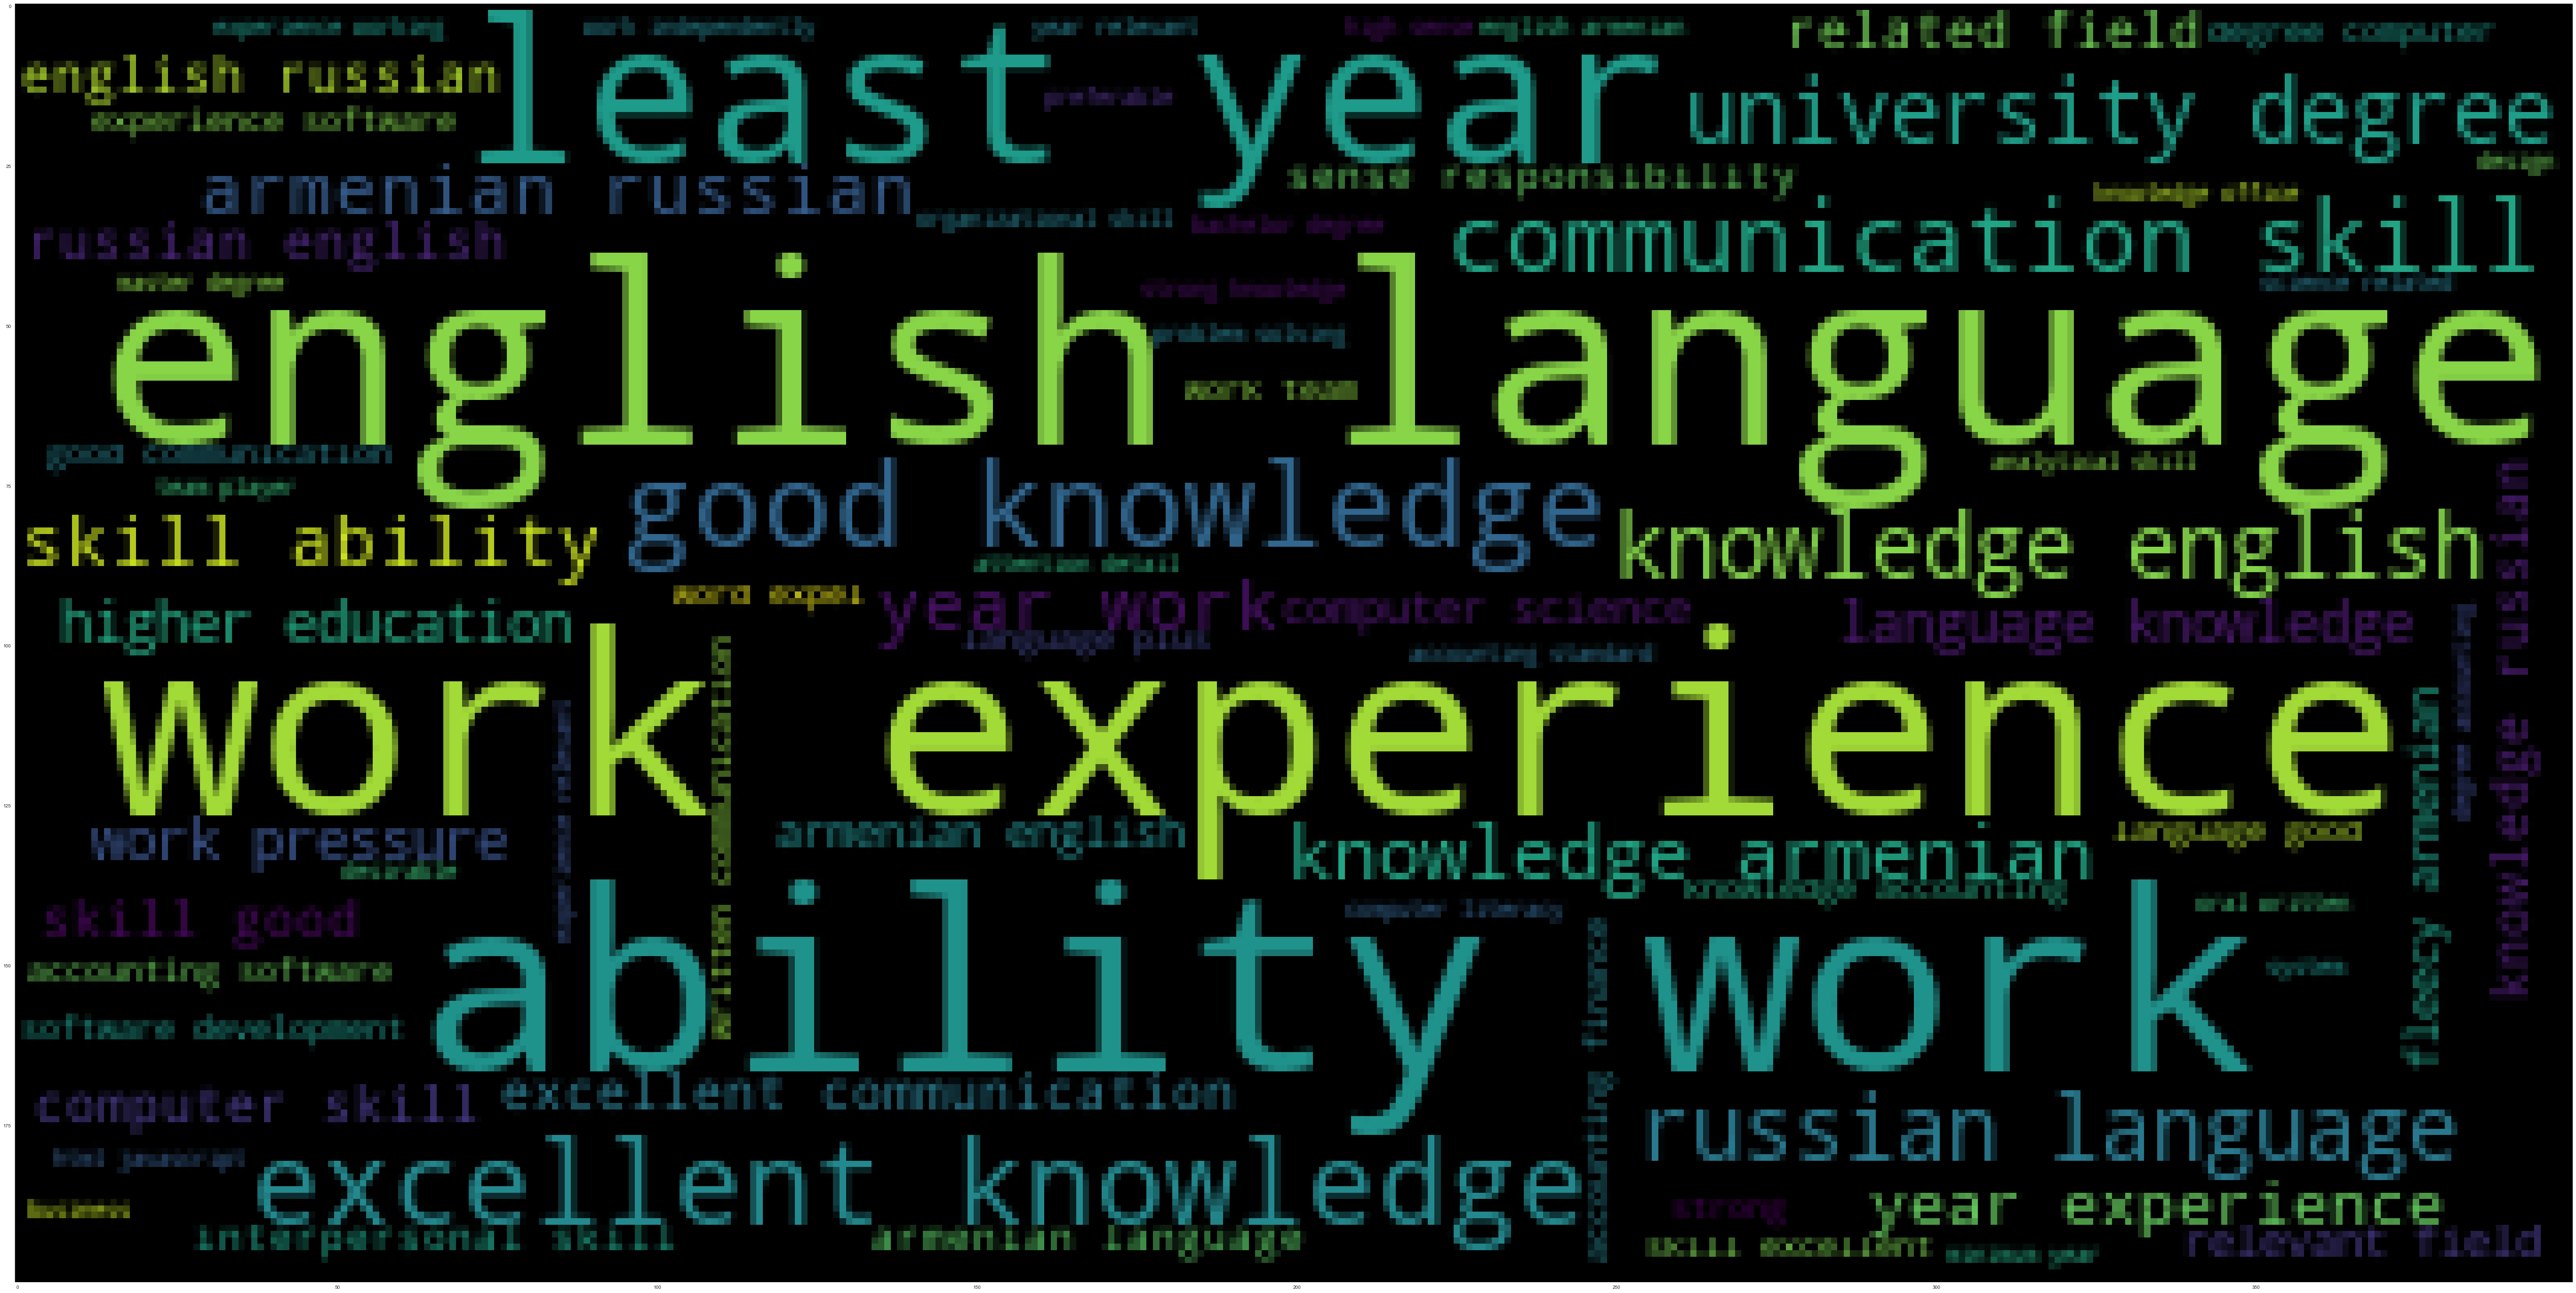

In [58]:
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

### Create user defined function for train the models

In [59]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    return metrics.accuracy_score(classifier.predict(feature_vector_train), label), metrics.accuracy_score(predictions, valid_y)

### Building different models with different vectors  (multiclass)

In [60]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1]
 [973 289]]


In [61]:
#!pip install imblearn
ros = RandomOverSampler(random_state=123)

X_train_tfidf_os, y_train_tfidf_os = ros.fit_sample(X_train_tfidf, y_train)

X_train_cnt_os, y_train_cnt_os = ros.fit_sample(xtrain_count, y_train)

X_train_tfidf_ngram_os, y_train_tfidf_ngram_os = ros.fit_sample(xtrain_tfidf_ngram, y_train)

unique_elements, counts_elements = np.unique(y_train_tfidf_os, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1]
 [973 973]]


In [62]:
#Naive Bayes
# Naive Bayes on TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf_os, y_train_tfidf_os, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_L1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_cnt_os, y_train_cnt_os, xtest_count, y_test)
print("NB  for L1, WordLevel TF-IDF: ", accuracy_L1)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf_ngram_os, y_train_tfidf_ngram_os, xtest_tfidf_ngram, y_test)
print("NB  for L1, N-Gram Vectors: ", accuracy_L1)

# gap between train and test is high so reject if its less we could use it
#0.617335352006056 train score
#0.4752 test score

NB  for L1, Count Vectors:  (0.9794450154162384, 0.9611727416798732)
NB  for L1, WordLevel TF-IDF:  (0.9691675231243576, 0.96513470681458)
NB  for L1, N-Gram Vectors:  (0.9552929085303186, 0.9334389857369255)


In [63]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf_os, y_train_tfidf_os, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), X_train_cnt_os, y_train_cnt_os, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf_ngram_os, y_train_tfidf_ngram_os, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)

# gap between train and test is high so reject if its less we could use it

#0.6820590461771385 train score
# 0.4672 test score

LR  for L1, Count Vectors:  (0.9964028776978417, 0.9801901743264659)
LR  for L1, WordLevel TF-IDF:  (1.0, 0.973851030110935)
LR  for L1, N-Gram Vectors:  (0.9820143884892086, 0.9690966719492868)


In [64]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(SVC(), X_train_tfidf_os, y_train_tfidf_os, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)



# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(SVC(), X_train_cnt_os, y_train_cnt_os, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(SVC(), X_train_tfidf_ngram_os, y_train_tfidf_ngram_os, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1)

# gap between train and test is high so reject if its less we could use it

#0.5229371688115064 train score
#0.3496 test score

SVC  for L1, Count Vectors:  (0.9994861253854059, 0.9849445324881141)
SVC  for L1, WordLevel TF-IDF:  (0.9922918807810894, 0.9786053882725833)
SVC  for L1, N-Gram Vectors:  (1.0, 0.9778129952456418)


### Adding Features to a Document-Term Matrix (binarly class)

In [70]:
# create a DataFrame that only contains the IT=1 and IT=0
job_post = df[(df.IT==0)| (df.IT==1)]

# define X and y
feature_cols = ['RequiredQual','sentiment']
X = df[feature_cols]
y = df.IT

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [72]:
# use CountVectorizer with text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_df=0.9,min_df=0.001, ngram_range=(2,3))
X_train_dtm = vect.fit_transform(X_train.RequiredQual)
X_test_dtm = vect.transform(X_test.RequiredQual)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('RequiredQual', axis=1).shape

(1893, 21631)
(631, 21631)


(1893, 1)

In [73]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.RequiredQual)
X_test_dtm = vect.transform(X_test.RequiredQual)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('RequiredQual', axis=1).shape

(1893, 3621)
(631, 3621)


(1893, 1)

In [74]:
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('RequiredQual', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('RequiredQual', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(631, 3622)

In [75]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.roc_auc_score(y_test, y_pred_class))

0.9841521394611727
0.9749226183652413


In [76]:
# use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.roc_auc_score(y_test, y_pred_class))

0.9857369255150554
0.9759472085291757


In [77]:
# use SVM with text column only
sm =svm.LinearSVC()
sm.fit(X_train_dtm, y_train)
y_pred_class = sm.predict(X_test_dtm)
acc_svm=metrics.accuracy_score(y_test, y_pred_class)
acc_svm

0.9841521394611727

In [78]:
# use SVM with all features
svm1 = svm.LinearSVC()
svm1.fit(X_train_dtm_extra, y_train)
y_pred_class = svm1.predict(X_test_dtm_extra)
acc_svm1=metrics.accuracy_score(y_test, y_pred_class)
acc_svm1

0.9841521394611727

Text(0.5, 16.0, 'Predicted label')

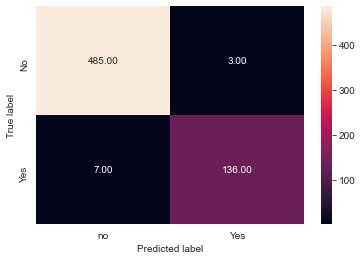

In [88]:
cm = metrics.confusion_matrix( y_test, y_pred_class)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')